RDDs numéricos
--------------

Funciones de estadística descriptiva implementadas en Spark

  | Método              |  Descripción                       
  | ------------------- | ---------------------------------- 
  | stats()             | Resumen de estadísticas            
  | mean()              | Media aritmética
  | sum(), max(), min() | Suma, máximo y mínimo
  | variance()          | Varianza de los elementos
  | sampleVariance()    | Varianza de una muestra
  | stdev()             | Desviación estándar
  | sampleStdev()       | Desviación estándar de una muestra
  | histogram()         | Histograma

Resumen de estadísticas:
 (count: 10000, mean: -0.0118394552475, stdev: 0.990163607721, max: 3.94401639864, min: -3.97517870132)
Número de outliers: 32


<Container object of 10 artists>

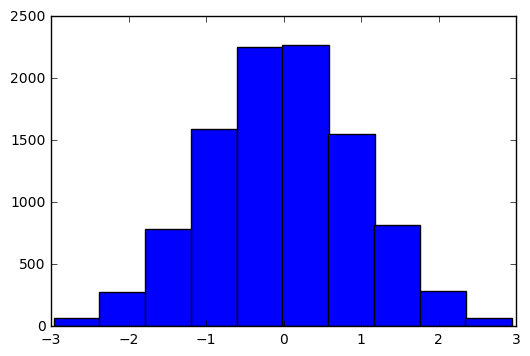

In [1]:
%matplotlib inline

from test_helper import Test
from __future__ import print_function

import matplotlib.pyplot as plt
import numpy as np
import pylab
from math import fabs

# Un RDD con datos aleatorios de una distribución normal
nrdd = sc.parallelize(np.random.normal(size=10000)).cache()

# Resumen de estadísticas
sts = nrdd.stats()
print("Resumen de estadísticas:\n {0}".format(sts))
# Filtra outliers
stddev = sts.stdev()
avg = sts.mean()
frdd = nrdd.filter(lambda x: fabs(x - avg) < 3*stddev).cache()
print("Número de outliers: {0}".format(sts.count() - frdd.count()))

# Obtiene un histograma con 10 grupos
x,y = frdd.histogram(10)
plt.bar(x[:-1],y,width=0.6)

## Práctica 3

A partir del fichero apat63_99.txt obtén la media del número de patentes presentadas en EEUU (código "US"), y representa en un gráfico de barras las patentes por año.

[(1963, 69), (1964, 87), (1965, 110), (1966, 122), (1967, 146), (1968, 110), (1969, 132), (1970, 151), (1971, 171), (1972, 191), (1973, 185), (1974, 205), (1975, 380), (1976, 375), (1977, 296), (1978, 277), (1979, 215), (1980, 275), (1981, 281), (1982, 269), (1983, 297), (1984, 293), (1985, 339), (1986, 306), (1987, 442), (1988, 364), (1989, 449), (1990, 461), (1991, 443), (1992, 423), (1993, 442), (1994, 542), (1995, 469), (1996, 514), (1997, 496), (1998, 590), (1999, 734)]
314.891891892
1 test passed.


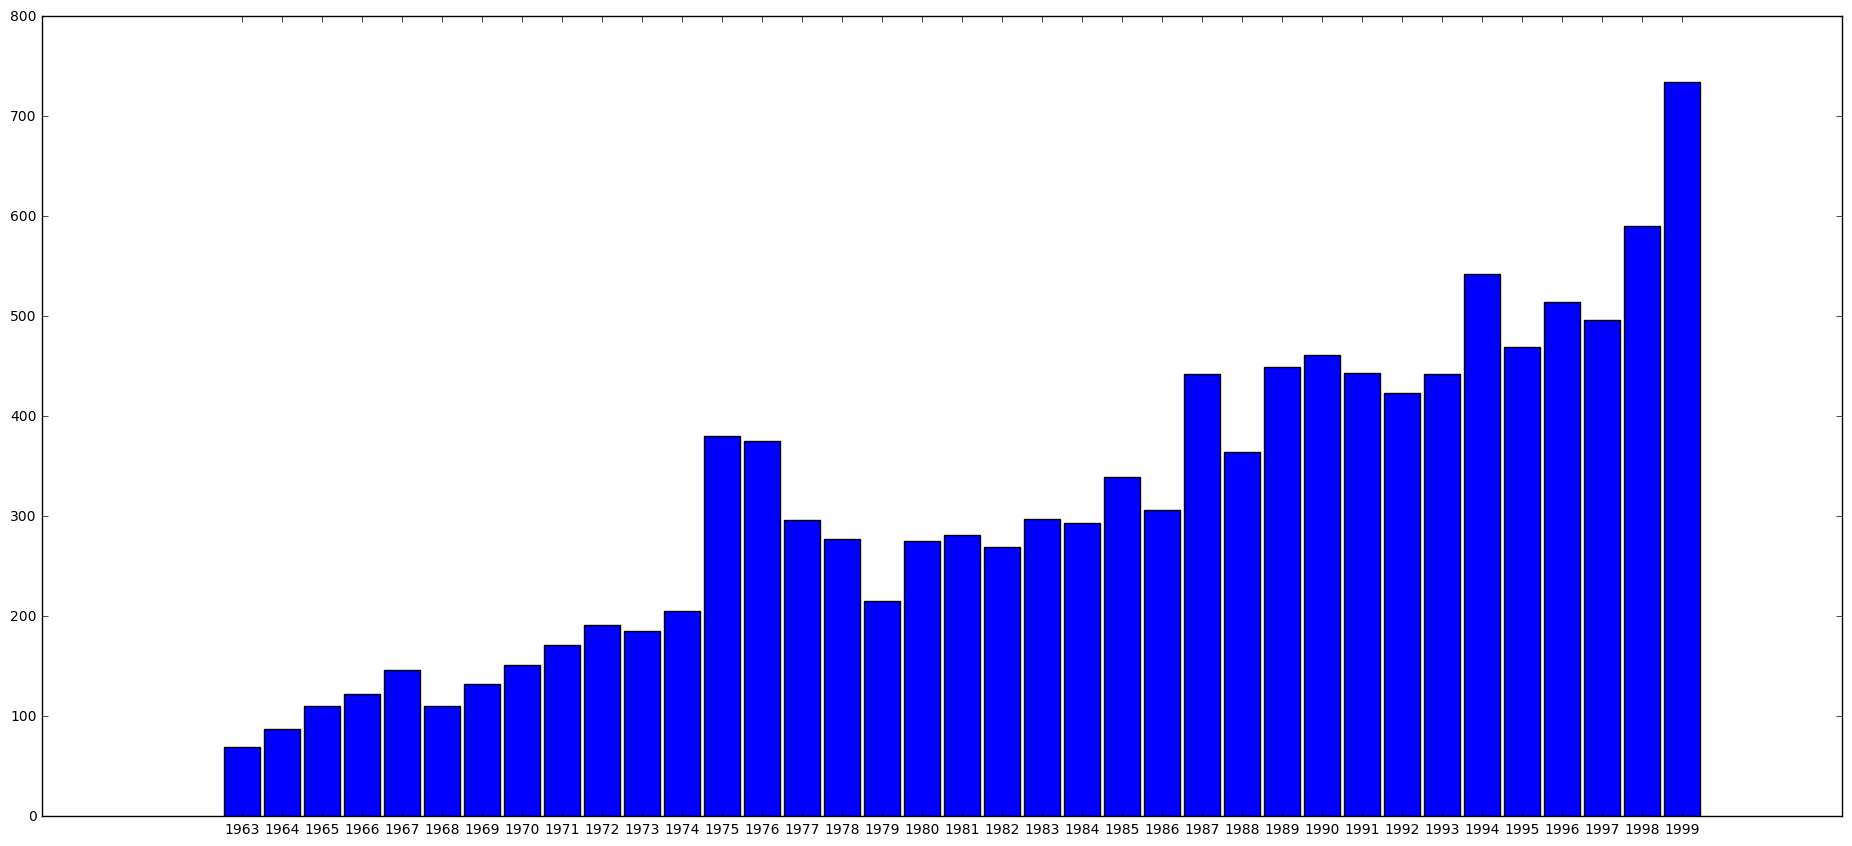

In [47]:
rdd = sc.textFile("datos/patentes-mini/apat63_99.txt")

from operator import add

prdd = rdd.filter(lambda x: x.split(",")[4] == '"US"') \
.map(lambda x: (int(x.split(",")[1].encode('utf-8')),1))

redprdd = prdd.reduceByKey(add)

#print (redprdd.collect())

# Obtiene un rdd que nos proporcione, para las patentes "US" el número de 
# patentes por año (año, número_de_patentes) ordenadas por año
yearNum = redprdd.sortByKey()

#print(yearNum.collect())

# Calcula la media del número de patentes
media = float(sum(yearNum.values().collect()))/float(len(yearNum.keys().collect()))

#print(media)

Test.assertTrue(fabs(media - 314.891891892) < 1e-8)

# Crea el gráfico
years = yearNum.keys().collect()
numPats = yearNum.values().collect()

yearsRange = np.arange(len(years))
f = plt.figure()
ax = f.add_axes([0, 0, 3, 2])
ax.bar(yearsRange, numPats, align='center', width=0.9)
ax.set_xticks(yearsRange)
ax.set_xticklabels(years)